In [3]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

# Simulating input current :
Synaptic input I(t) is in sinusoidal form.

    I(t)=Imean(1+sin(2πt/0.01))

Simulate in between t = 0 to t = 0.009

In [16]:
import numpy as np
import matplotlib.pyplot as plt

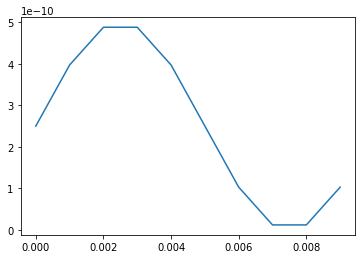

In [42]:
# Plain simulation:
t = np.array( [x*dt for x in range(10)] ,dtype=float)
i = i_mean*(1+np.sin(2*np.pi*t/0.01))
plt.plot(t,i)
plt.show()

# Simulating Barrier potential using Euler's method

Barrier Potential:
$$ {τ_{m} V(t+Δt)−V(t) \over Δt} = E_{l}−V(t)+RI(t) $$

Eulers method:

Forward $$ y_{n+1} = y_{n} + h f(t_{n},y_{n}) $$

Backward $$ y_{n+1} = y_{n} + h f(t_{n+1},y_{n+1}) $$

Barrier Potential in forward euler form:
$$ V_{n+1} = V_{n} +  {Δt\over {τ_{m}}} (E_{l}−V_{n}+RI{n}) $$

Boundary Condition: $$ t = 0 : V(0) = E_{l}$$

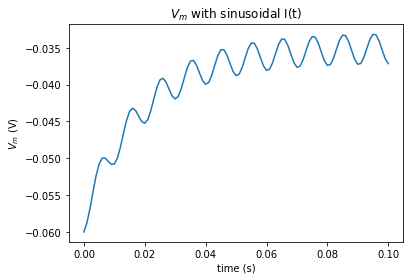

In [43]:
t = np.array( [x*dt for x in range(101)] ,dtype=float)
i = i_mean*(1+np.sin(2*np.pi*t/0.01))
plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')
v = [el]
for ind , ti in enumerate(t):
    if ind == 0:
        continue
    v.append(v[-1] + dt/tau*(el-v[-1]+ r*i[ind-1] ))
v = np.array(v ,dtype=float)
plt.plot(t,v)
plt.show()


# Random Synamptic Input:

$$ I(t) = I_{mean} (1 + 0.1 \sqrt{t_{max}\over {Δt}} ξ(t)) \quad with \ ξ(t) ~ U(−1,1)$$ 


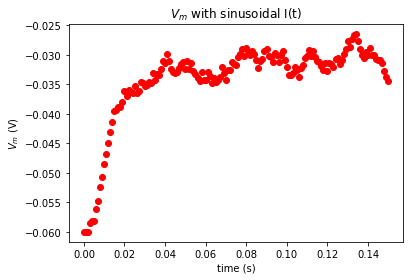

In [52]:
np.random.seed(2022)
plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')
step_end = int(t_max/dt)
v = [el]
i = [0]
t = [0]
for step in range(step_end):
    new_i = i_mean*(1+ 0.1*np.sqrt(t_max/dt)*np.random.random()*2-1)
    new_t = t[-1] + dt
    new_v = v[-1] + dt/tau*(el-v[-1]+ r*i[-1])
    v.append(new_v)
    t.append(new_t)
    i.append(new_i)
plt.plot(t,v,'ro')
plt.show()

# Ensemble statistics

We will repeat the random synaptic input for N times over a fixed range of time.
We will also be plotting Ensemble along with mean ans standard deviations
 

In [87]:
N = 100                      # Total realisations
step_end = int(t_max/dt)    # Total steps in one simulation

In [88]:
# collection of measured quantites over whole ensemble 
I = np.zeros((N,step_end)) 
V = np.zeros((N,step_end))
T = np.zeros((step_end))
for i in range(N):
    V[i][0] = el

for t in range(1,step_end):
    T[t] = T[t-1] + dt


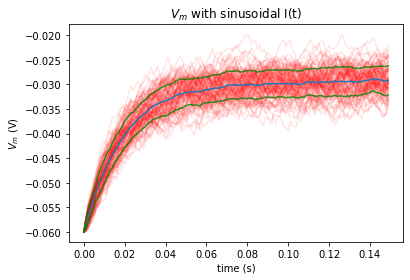

In [89]:

plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')


for n in range(N):
    for step in range(step_end):
        I[n][step] = i_mean*(1+ 0.1*np.sqrt(t_max/dt)*np.random.random()*2-1)
        if step == 0:
            continue
        V[n][step] = V[n][step-1] + dt/tau*(el-V[n][step-1]+ r*I[n][step-1])
        
 
    plt.plot(T,V[n],'r',alpha=0.1,markersize=1)

v_mean = V.mean(axis=0)
v_sd = V - v_mean
v_sd = np.power(v_sd,2)
v_sd = v_sd.mean(axis=0)
v_sd = np.power(v_sd,0.5)
v_psd = v_mean + v_sd
v_nsd = v_mean - v_sd
plt.plot(T,v_mean,markersize=5)
plt.plot(T,v_psd,'g', alpha=0.8, markersize=2)
plt.plot(T,v_nsd,'g', alpha=0.8, markersize=2)
plt.show()